# Heart Disease - İkili Sınıflandırma Problem .

Bu proje bir Classification projesidir.

Cleveland veritabanı, kalp hastalığı tahminine yönelik bir sınıflandırma problemine sahiptir. Bu veri seti, hastaların kalp hastalığı olup olmadığını tahmin etmek amacıyla kullanılır ve 76 öznitelik içerir, ancak çoğu deney yalnızca 14 özniteliği kullanır. Hedef değişken (class label) 0 ile 4 arasında bir değeri alır, burada her bir değer bir kalp hastalığı durumu ile ilişkilidir. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings(action="ignore")

In [4]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

# EDA

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Veri Görselleştirme

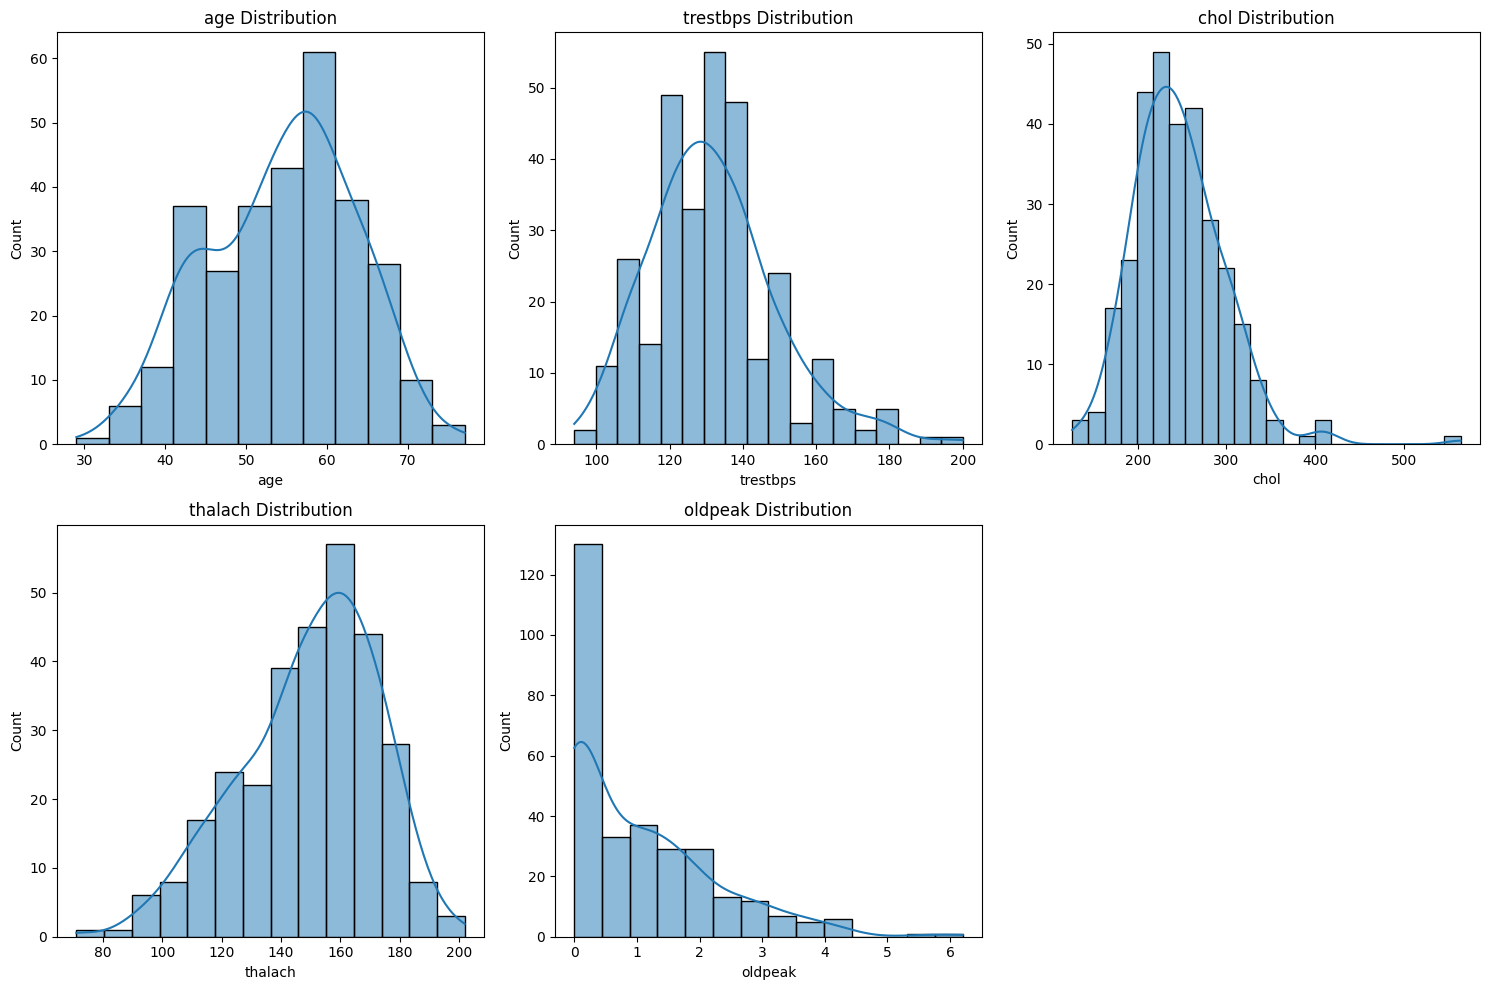

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sayısal sütunları seçelim
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Histogramları çizelim
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


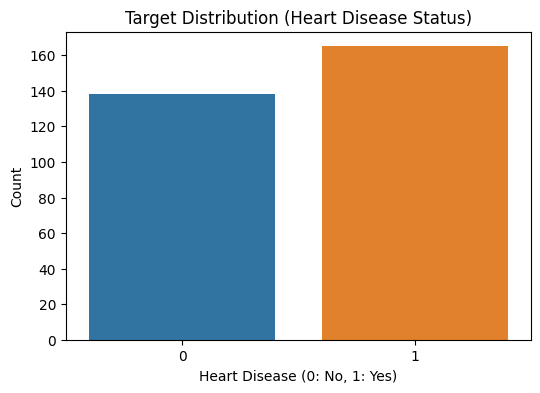

In [15]:
# target değişkeninin dağılımını görselleştirelim
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Target Distribution (Heart Disease Status)')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


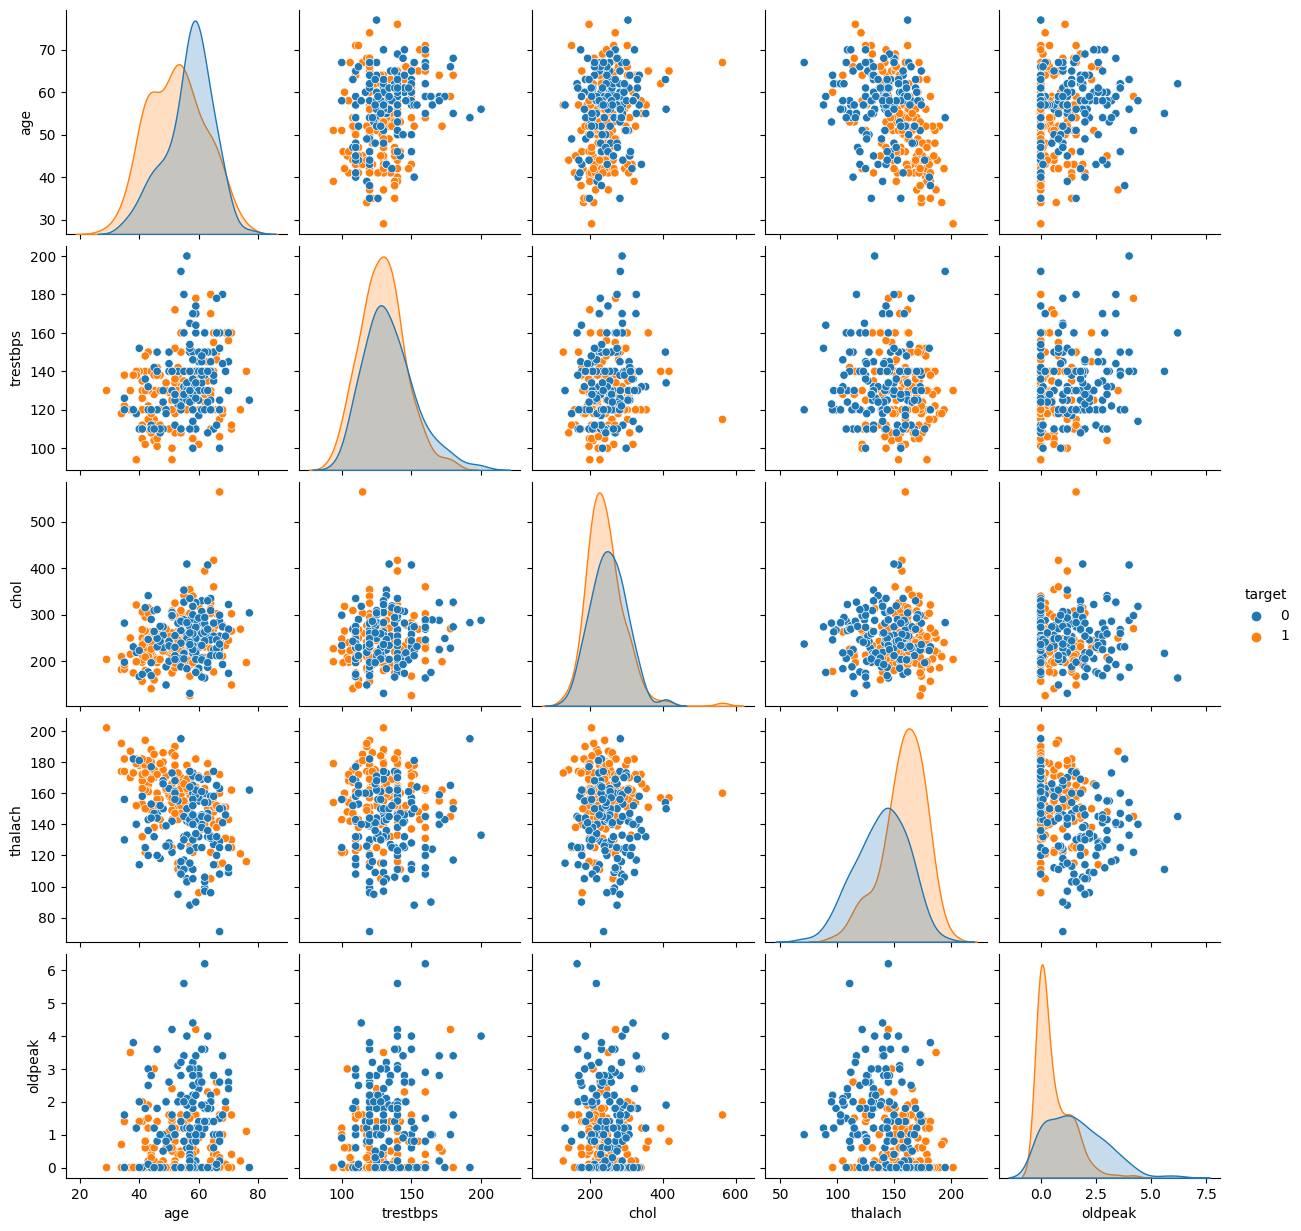

In [17]:
# Pairplot ile tüm sayısal özniteliklerin ilişkisini görselleştirelim
sns.pairplot(df[numerical_features + ['target']], hue='target')
plt.show()


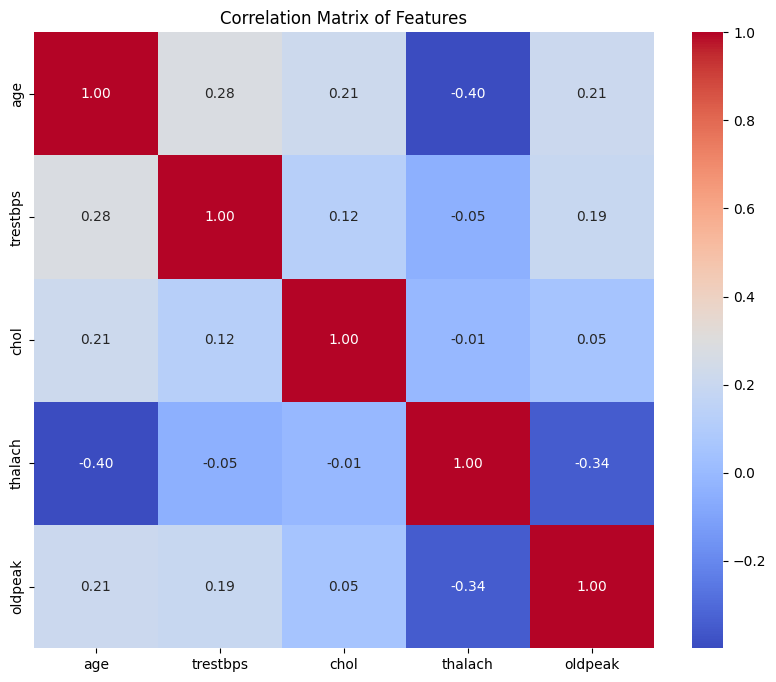

In [18]:
# Korelasyon matrisini hesaplayalım
corr_matrix = df[numerical_features].corr()

# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


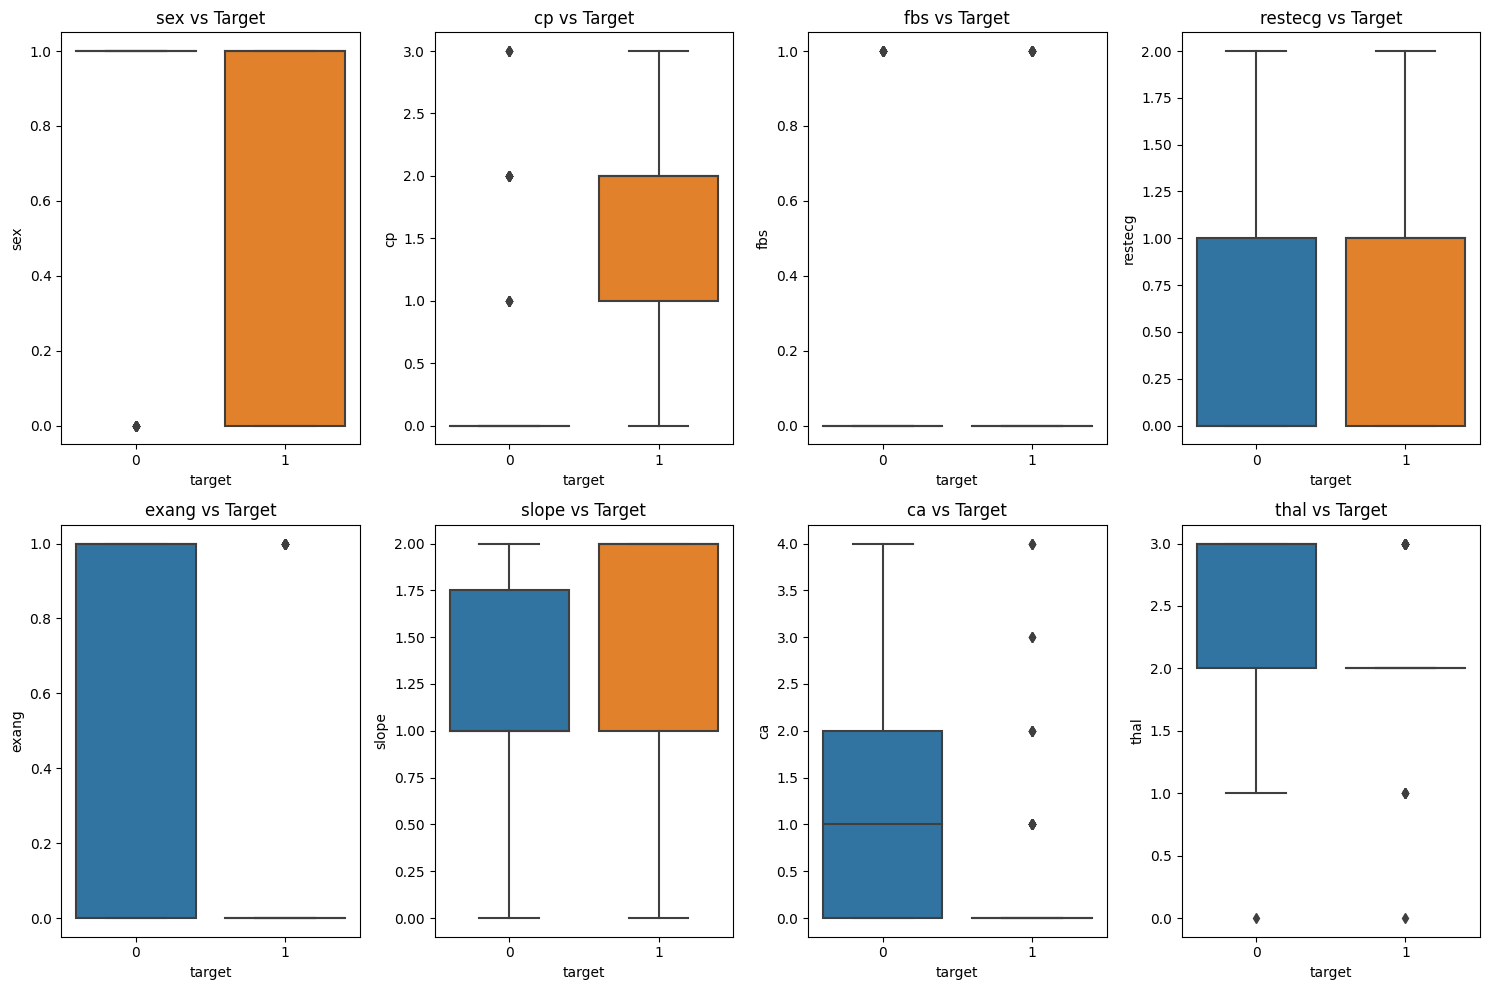

In [20]:
# Kategorik değişkenler için hedef değişkeni ile ilişkiyi boxplot ile görselleştirelim
plt.figure(figsize=(15, 10))

# Her bir kategorik değişken için boxplot çizelim
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Target')

plt.tight_layout()
plt.show()


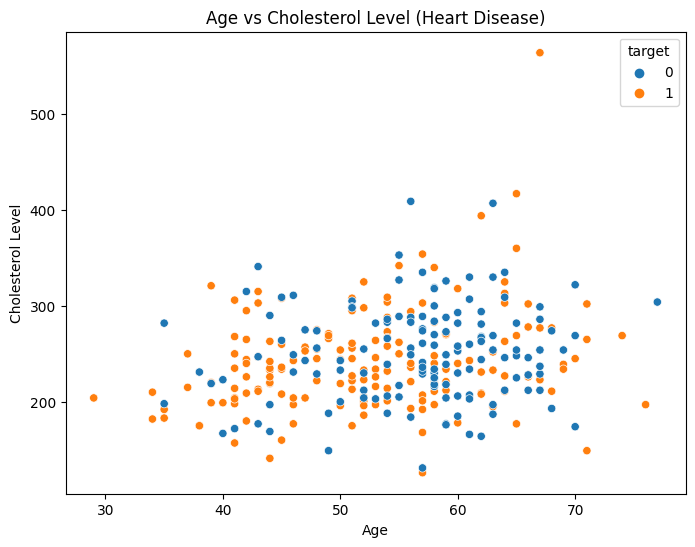

In [21]:
# Yaş ve kolesterol seviyesi ile kalp hastalığı durumu arasındaki ilişkiyi görselleştirelim
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', hue='target', data=df)
plt.title('Age vs Cholesterol Level (Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()


# Modelleme

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Özellikler (x) ve hedef değişken (y)
x = df.drop(columns=['target'])
y = df['target']

# Eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Verileri ölçeklendirme
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Lojistik Regresyon Modeli
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_scaled, y_train)

# Test verisiyle tahmin yapma
y_pred_logreg = logreg.predict(x_test_scaled)

# Sonuçları değerlendirme
print("Lojistik Regresyon Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Lojistik Regresyon Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



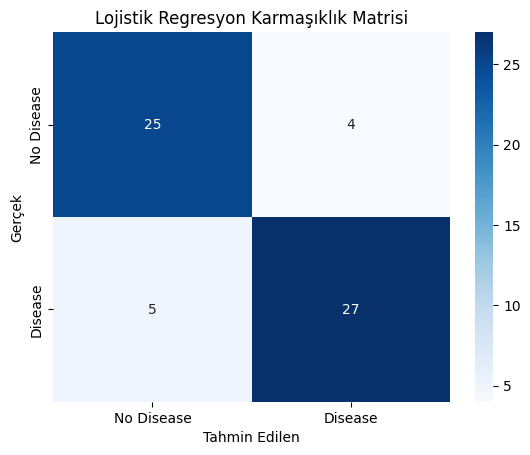

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Lojistik Regresyon için karmaşıklık matrisi
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Lojistik Regresyon Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()


# Modelleme (Derin Öğrenme ile)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Özellikler ve hedef değişken
x = df.drop(columns=['target'])
y = df['target']

# Eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Verileri ölçeklendirme
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [28]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Yapay Sinir Ağı Modeli
model = models.Sequential()

# Giriş katmanı
model.add(layers.InputLayer(input_shape=(x_train_scaled.shape[1],)))

# Gizli katmanlar
model.add(layers.Dense(64, activation='relu'))  # 64 nöronlu ilk gizli katman
model.add(layers.Dense(32, activation='relu'))  # 32 nöronlu ikinci gizli katman

# Çıkış katmanı
model.add(layers.Dense(1, activation='sigmoid'))  # Çift sınıflama olduğu için sigmoid kullanıyoruz

# Modeli derlemek
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
# Modeli eğitme
history = model.fit(x_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(x_test_scaled, y_test))


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6498 - loss: 0.6625 - val_accuracy: 0.8033 - val_loss: 0.5891
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7595 - loss: 0.5747 - val_accuracy: 0.8689 - val_loss: 0.5228
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7668 - loss: 0.5480 - val_accuracy: 0.8689 - val_loss: 0.4799
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7587 - loss: 0.5059 - val_accuracy: 0.8689 - val_loss: 0.4491
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8099 - loss: 0.4470 - val_accuracy: 0.8689 - val_loss: 0.4292
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8099 - loss: 0.4205 - val_accuracy: 0.8689 - val_loss: 0.4168
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8219 - loss: 0.4174 - val_accuracy: 0.8689 - val_loss: 0.4055
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8736 - loss: 0.3504 - val_accuracy: 0.8525 - val_loss: 0.3988
Epoch 9

In [30]:
# Test setiyle modelin değerlendirilmesi
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8501 - loss: 0.4849 
Test Loss: 0.4430067241191864
Test Accuracy: 0.868852436542511


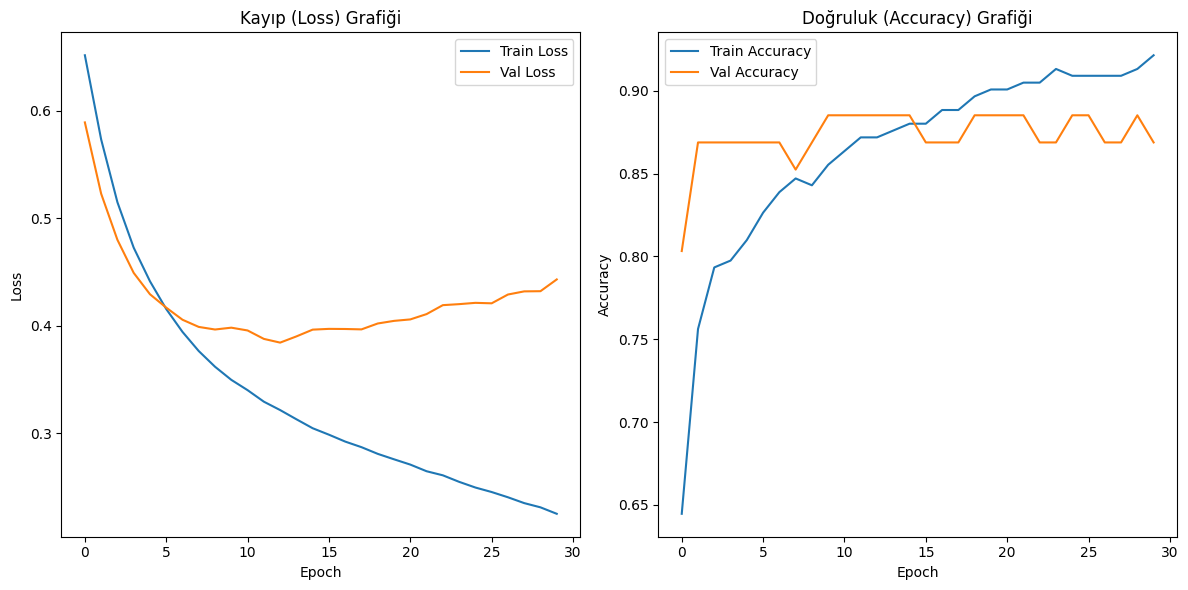

In [31]:
import matplotlib.pyplot as plt

# Eğitim sürecindeki kayıp ve doğruluk
plt.figure(figsize=(12, 6))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Kayıp (Loss) Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Doğruluk (Accuracy) Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Yeni Veriler Üzerinde Tahmin Yapma 

In [32]:
# Yeni veriler üzerinde tahmin yapma
y_pred = model.predict(x_test_scaled)

# Çift sınıflama için tahminlerin 0 veya 1'e dönüştürülmesi
y_pred_classes = (y_pred > 0.5).astype("int32")

# Tahmin sonuçlarını değerlendirme
from sklearn.metrics import accuracy_score
print("Doğruluk:", accuracy_score(y_test, y_pred_classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Doğruluk: 0.8688524590163934


Test setimizde elde ettiğimiz sonuçlar, modelimizin genel anlamda iyi bir performans gösterdiğini işaret ediyor. Özellikle, Test Accuracy değeri olan %86.88, modelin doğru sınıflandırma yapmada başarılı olduğunu gösteriyor. Ayrıca, Test Loss değeri 0.44 civarında, bu da modelin kayıp fonksiyonunun oldukça düşük olduğunu ve tahminlerin doğru olduğunu ifade eder.
Test doğruluğu: %86.89 (0.8688) ve bu, modelimizin kalp hastalığı sınıflandırma problemini oldukça iyi çözdüğünü gösteriyor. Yüksek doğruluk oranı, modelinizin çoğu test örneğini doğru şekilde sınıflandırdığını ve genelleme gücünün iyi olduğunu işaret eder.

# Modeli Kaydetme

In [33]:
# Modeli kaydet
model.save('heart_disease_model.h5')
